In [1]:
import warnings
import geopandas
import pandas

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline

from plotting import plot_correlation, plot_parameter
import intervals

joined = geopandas.GeoDataFrame()
parameters = intervals.parameters
for index, filter_parameter in enumerate(parameters):
    i = intervals.query(filter_parameter, intervals.location_2222).drop(['end_date', 'sample_location', 'geometry', 'parameter', 'unit'], axis=1)
    if index == 0:
        joined = pandas.concat([joined, i])
    else:
        joined = joined.merge(i, how='outer', on='start_date', suffixes = (f'_{parameters[index-1]}', f'_{filter_parameter}'))
        
    if index == len(parameters) - 1:
        joined = joined.rename(columns={
            'avg_value': f'avg_value_{filter_parameter}',
            'median_value': f'median_value_{filter_parameter}',
            'max_value': f'max_value_{filter_parameter}',
            'min_value': f'min_value_{filter_parameter}'})

joined

,avg_value_temperature,median_value_temperature,max_value_temperature,min_value_temperature,start_date,avg_value_phosphorus,median_value_phosphorus,max_value_phosphorus,min_value_phosphorus,avg_value_nitrates,...,max_value_conductivity,min_value_conductivity,avg_value_tss,median_value_tss,max_value_tss,min_value_tss,avg_value_ecoli,median_value_ecoli,max_value_ecoli,min_value_ecoli
0,NaN,NaN,NaN,NaN,1994-11-23,0.0300,0.030,0.030,0.03,0.500,...,NaN,NaN,0.4,0.4,0.6,0.2,260.0,260.0,510.0,10.0
1,NaN,NaN,NaN,NaN,1995-03-23,0.2200,0.220,0.220,0.22,1.500,...,NaN,NaN,15.4,15.4,15.4,15.4,10000.0,10000.0,10000.0,10000.0
2,NaN,NaN,NaN,NaN,1995-07-21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1995-11-18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1996-03-17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,2022-03-01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,2022-06-29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,2022-10-27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,22.355,22.355,27.27,17.44,2023-02-24,0.0225,0.021,0.038,0.01,0.404,...,489.3,458.29,1.8,1.8,2.2,1.4,693.0,693.0,866.0,520.0


,avg_value_temperature,median_value_temperature,max_value_temperature,min_value_temperature,start_date,avg_value_phosphorus,median_value_phosphorus,max_value_phosphorus,min_value_phosphorus,avg_value_nitrates,...,max_value_conductivity,min_value_conductivity,avg_value_tss,median_value_tss,max_value_tss,min_value_tss,avg_value_ecoli,median_value_ecoli,max_value_ecoli,min_value_ecoli
count,31.000000,31.000000,31.000000,31.000000,88,32.000000,32.000000,32.000000,32.000000,32.000000,...,30.000000,30.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000
mean,18.868333,18.827581,21.011613,16.765806,2009-03-09 00:00:00,0.040155,0.039636,0.049141,0.032675,0.355126,...,548.303333,441.173000,2.052990,2.048906,2.459062,1.653125,659.471875,650.501563,761.6875,561.596875
min,6.570000,6.570000,6.570000,6.570000,1994-11-23 00:00:00,0.006000,0.006000,0.008000,0.004000,0.008000,...,333.000000,303.000000,0.100000,0.100000,0.100000,0.100000,6.000000,6.000000,6.0000,1.000000
25%,15.147500,15.147500,18.105000,10.620000,2002-01-15 00:00:00,0.021531,0.019938,0.030000,0.004000,0.097375,...,433.550000,380.575000,0.908750,0.908750,0.950000,0.500000,66.525000,66.525000,82.2750,26.375000
50%,20.330000,20.330000,23.540000,17.160000,2009-03-09 00:00:00,0.030000,0.030000,0.040000,0.020000,0.251750,...,488.150000,434.100000,1.315000,1.315000,1.415000,1.010000,191.200000,160.700000,192.7000,114.050000
75%,24.013333,24.047500,26.210000,21.635000,2016-05-01 00:00:00,0.041550,0.041212,0.050550,0.040000,0.492387,...,616.825000,477.675000,2.035000,2.035000,2.525000,1.725000,452.687500,476.537500,759.1000,266.200000
max,28.010000,28.010000,29.010000,28.010000,2023-06-24 00:00:00,0.220000,0.220000,0.220000,0.220000,1.770000,...,1720.000000,648.700000,15.400000,15.400000,15.400000,15.400000,10000.000000,10000.000000,10000.0000,10000.000000
std,6.321509,6.467426,7.051720,6.637377,NaN,0.041124,0.041645,0.040178,0.042960,0.397292,...,249.571233,89.027752,2.751506,2.740049,3.188637,2.646655,1779.647271,1776.615751,1804.8749,1774.888033


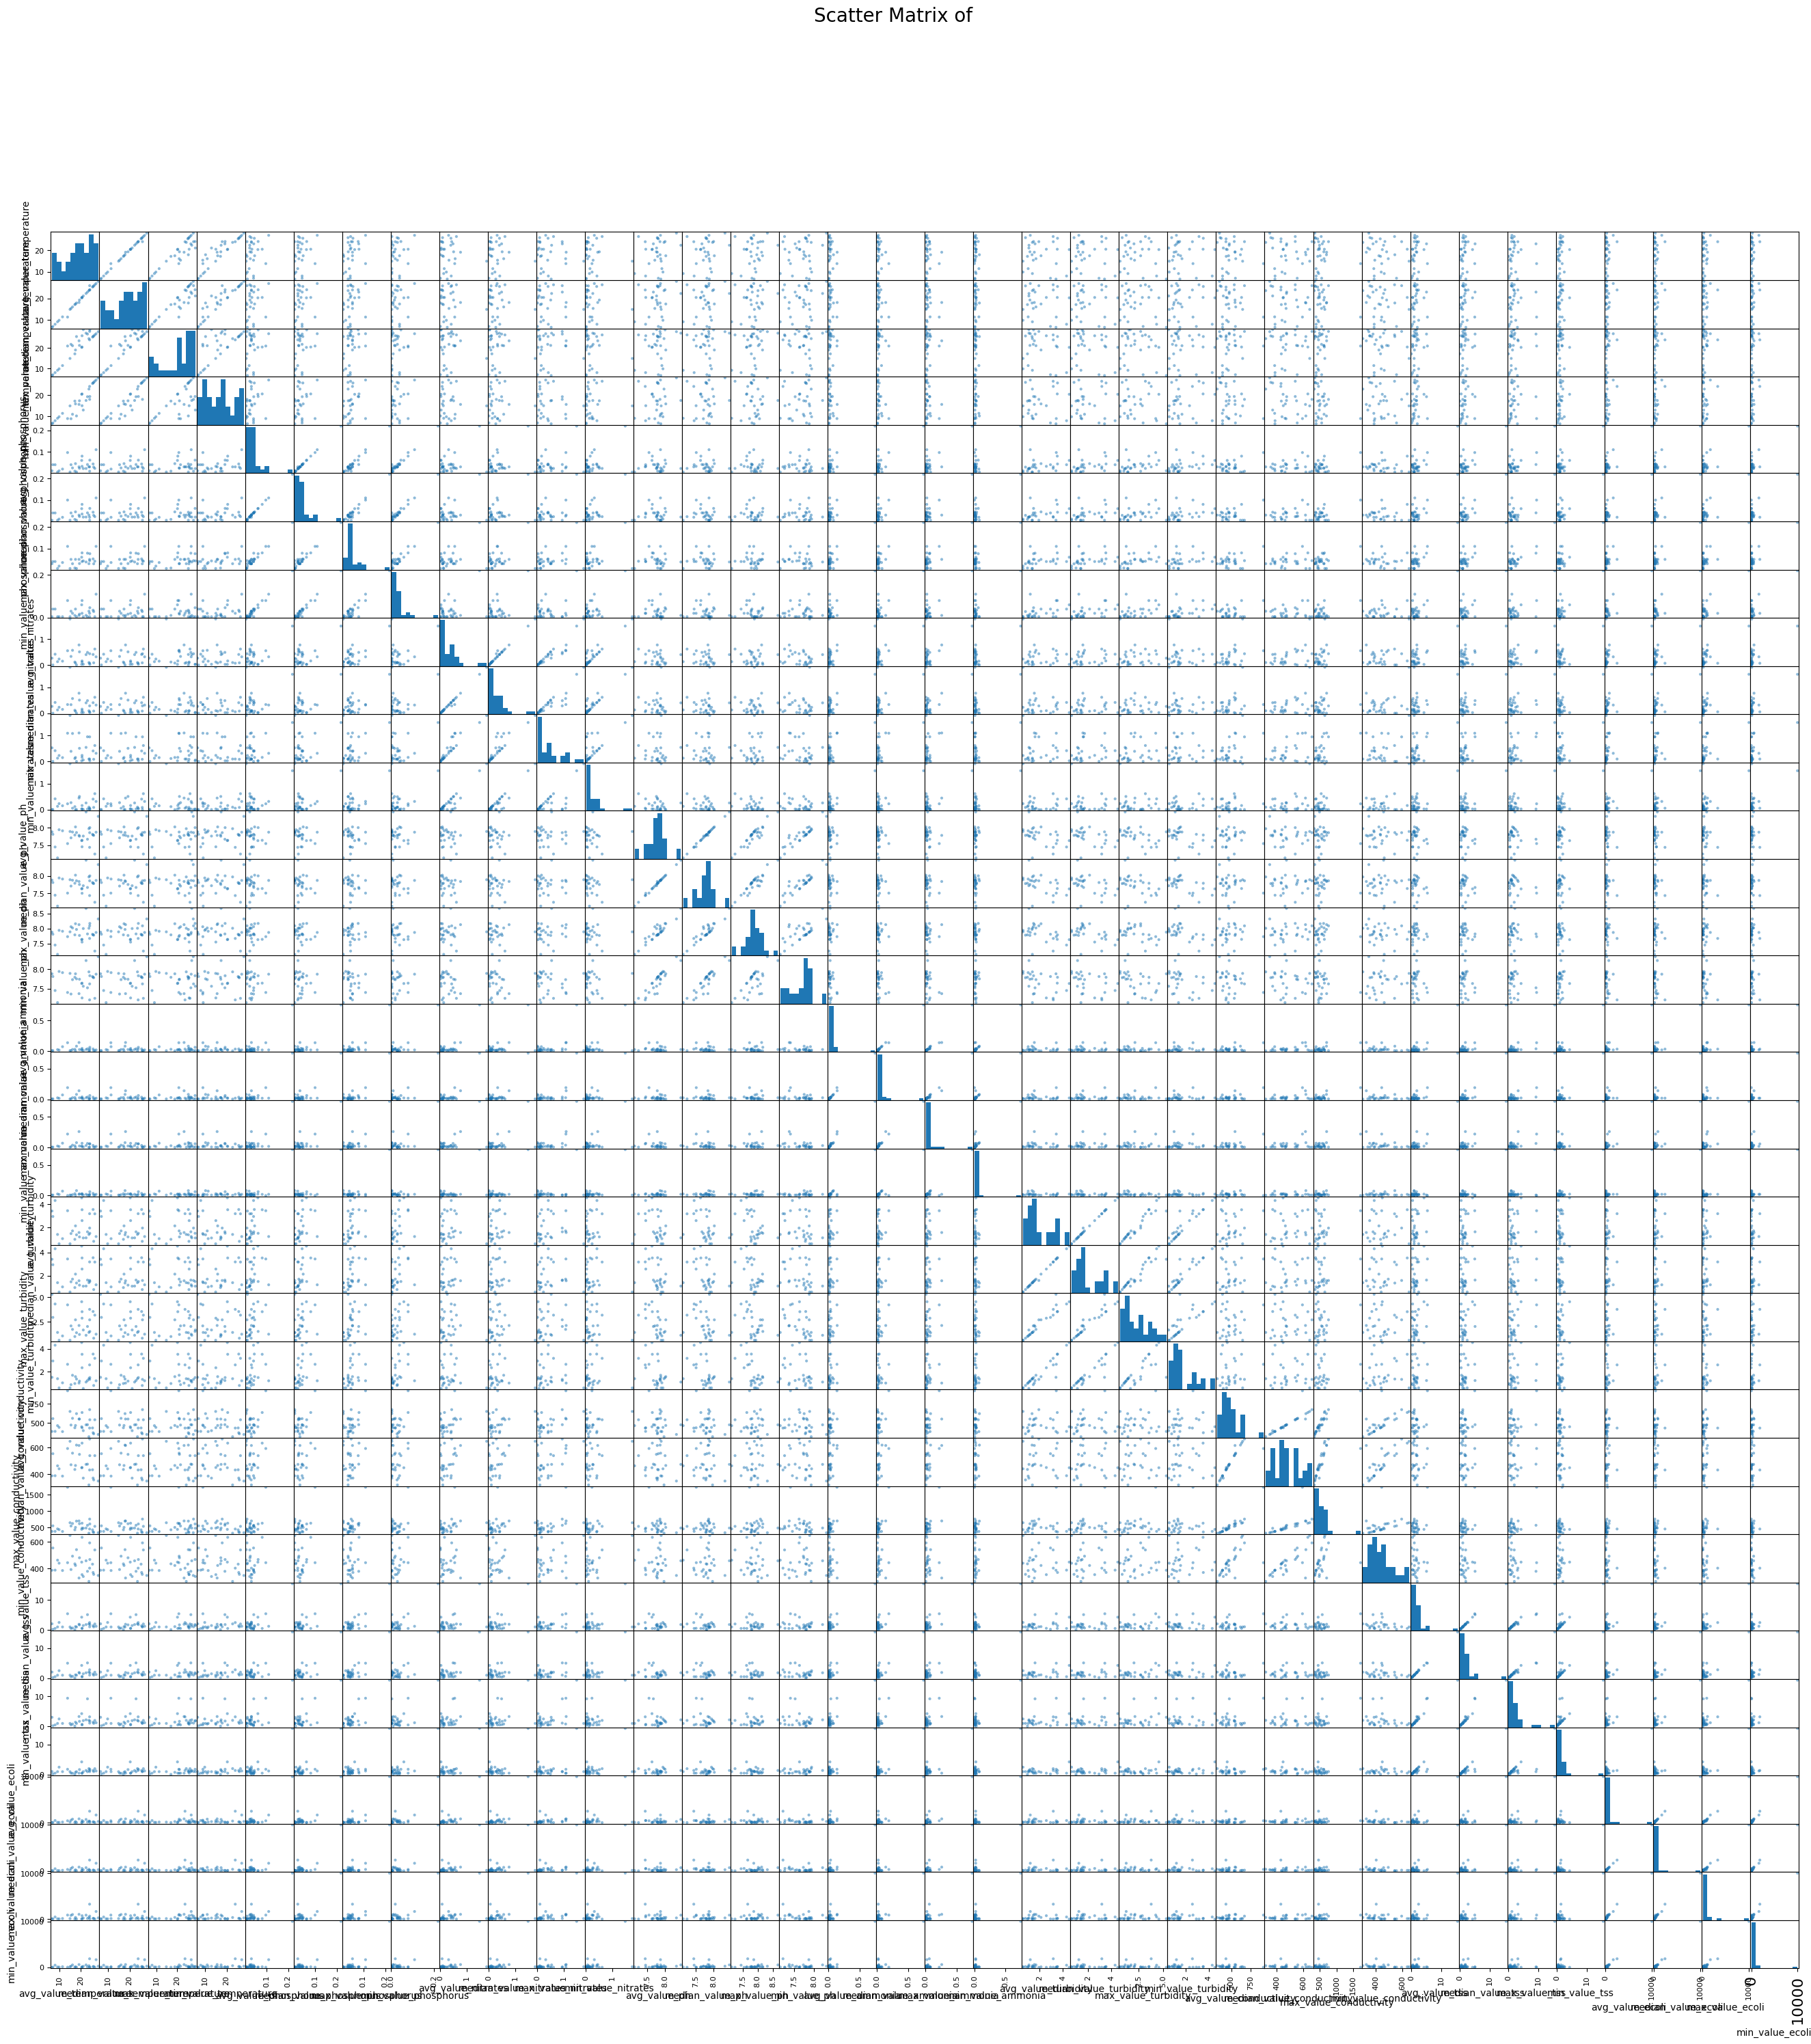

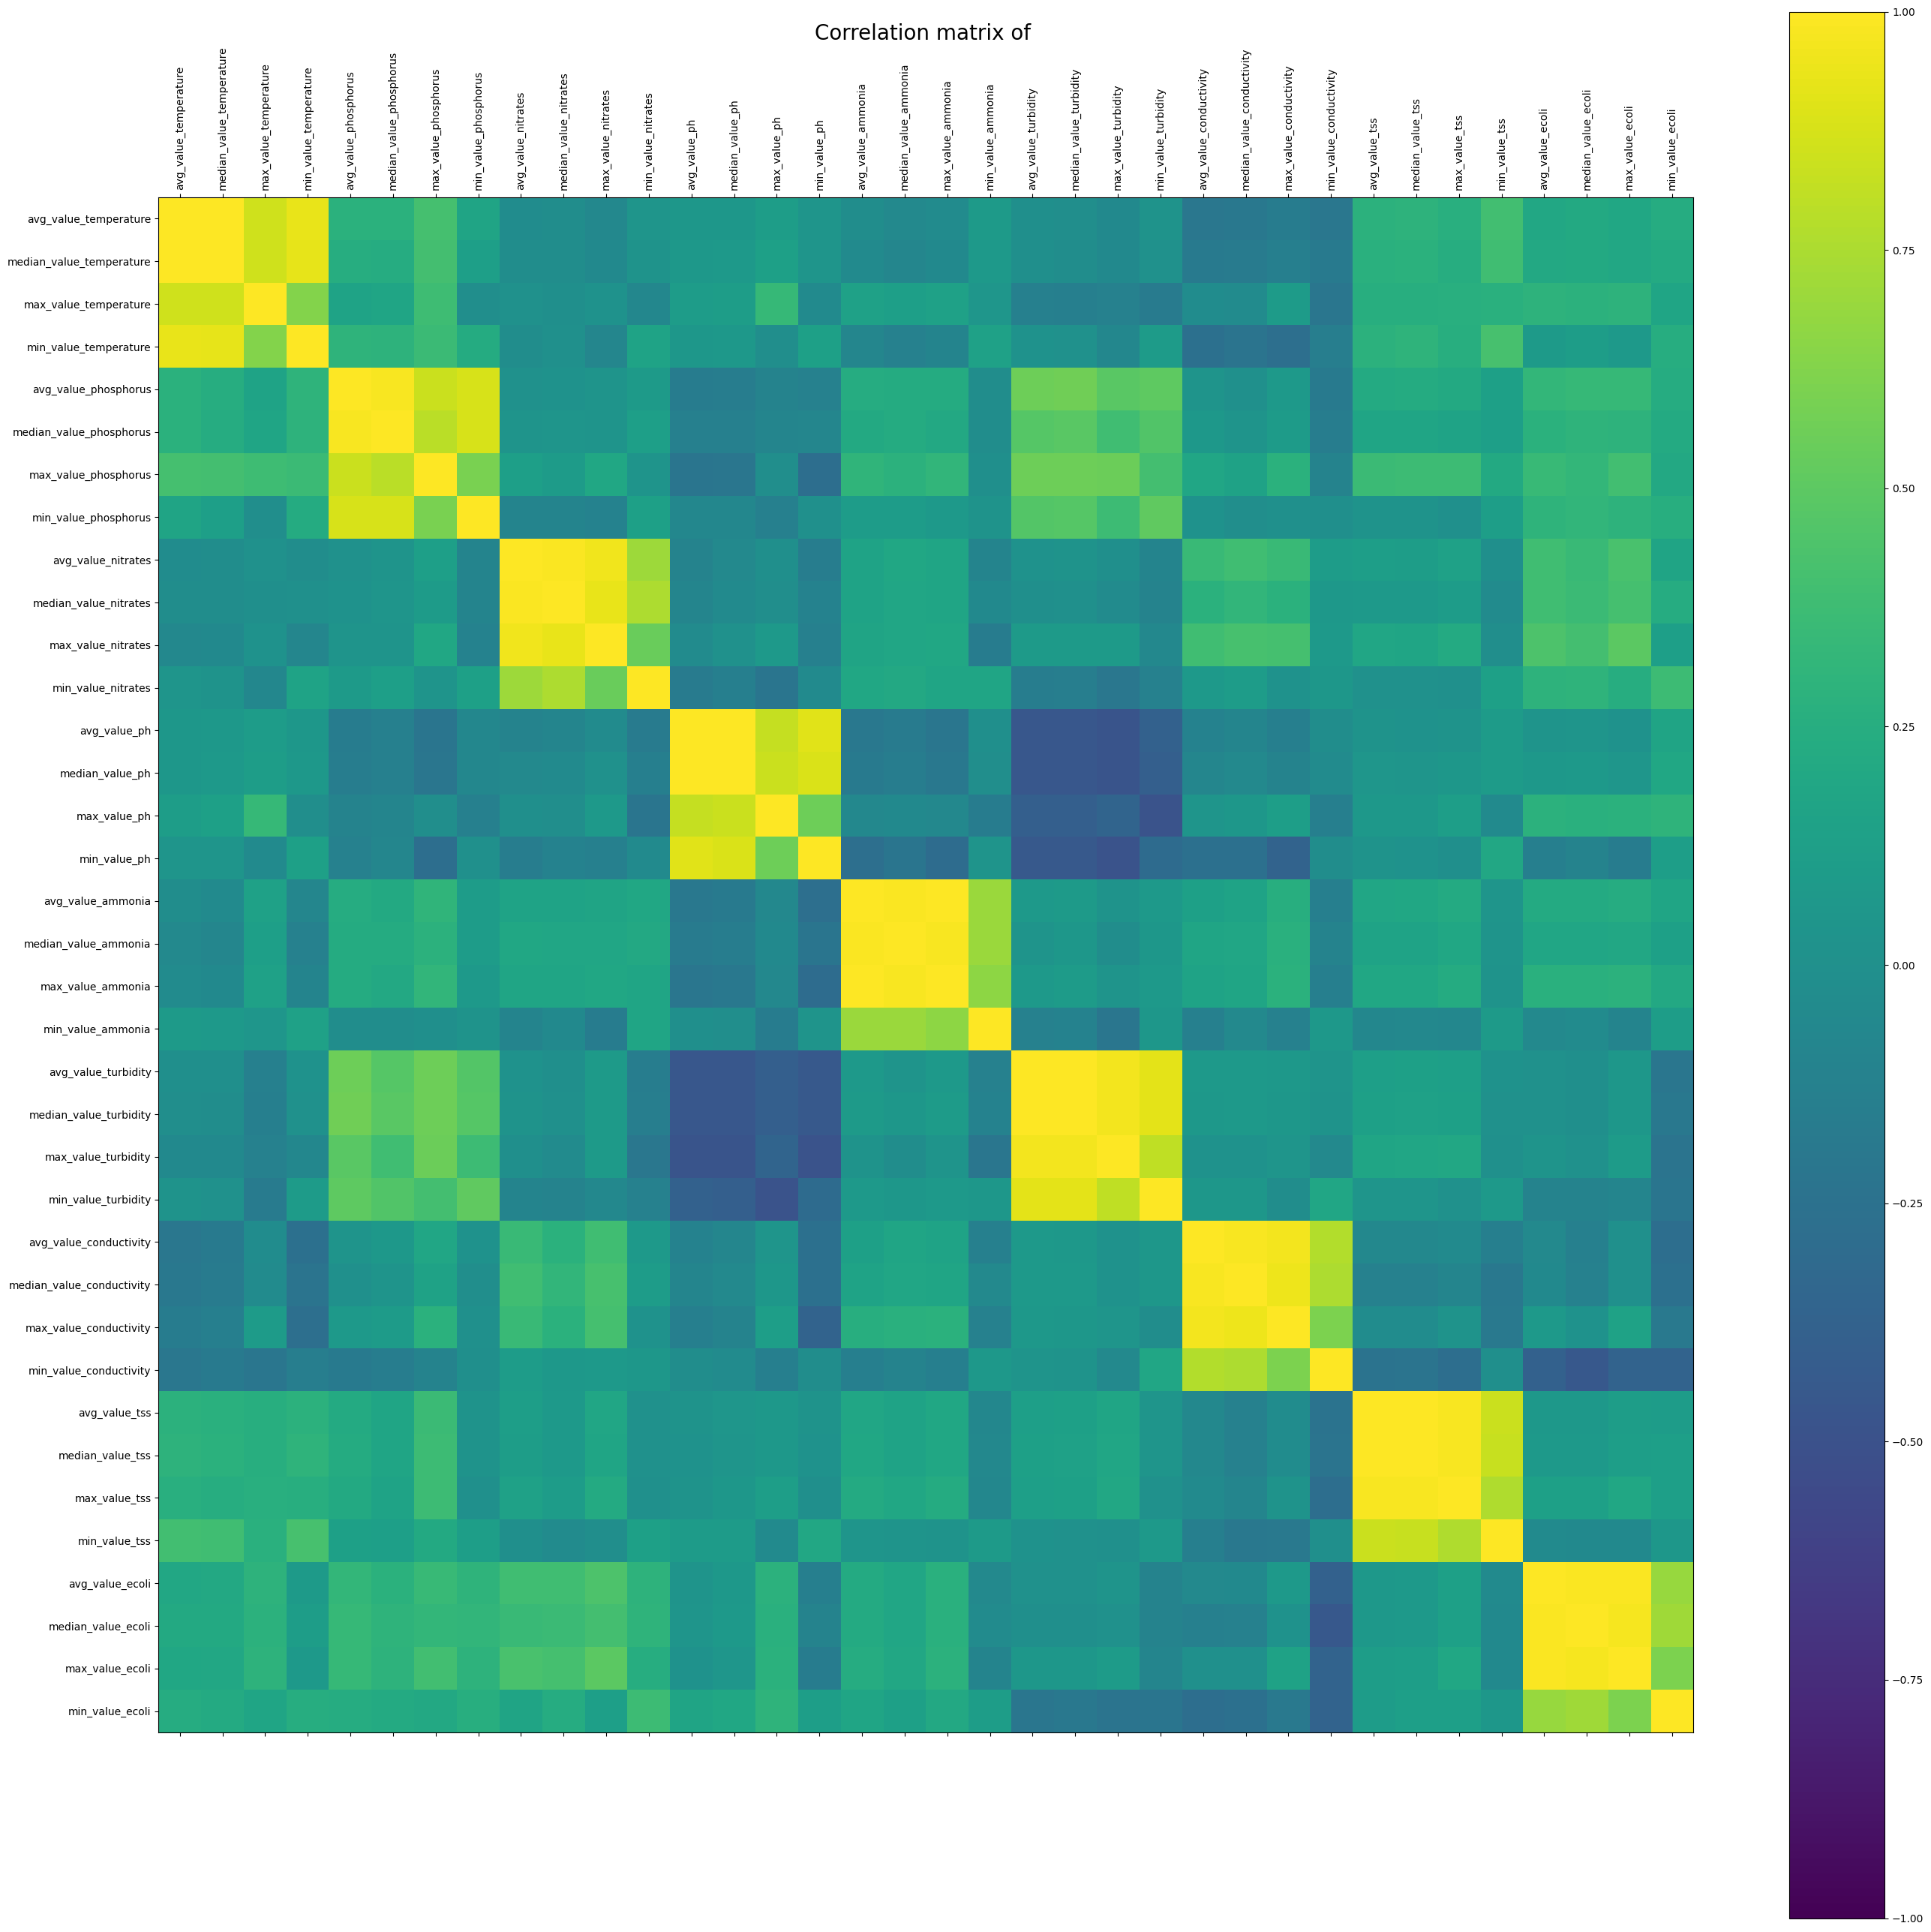

,avg_value_temperature,median_value_temperature,max_value_temperature,min_value_temperature,avg_value_phosphorus,median_value_phosphorus,max_value_phosphorus,min_value_phosphorus,avg_value_nitrates,median_value_nitrates,...,max_value_conductivity,min_value_conductivity,avg_value_tss,median_value_tss,max_value_tss,min_value_tss,avg_value_ecoli,median_value_ecoli,max_value_ecoli,min_value_ecoli
avg_value_temperature,1.000000,0.995564,0.852102,0.931949,0.279162,0.278479,0.412304,0.164147,-0.028705,-0.021927,...,-0.159973,-0.204472,0.281837,0.292172,0.261814,0.394352,0.200788,0.215570,0.193890,0.238876
median_value_temperature,0.995564,1.000000,0.859361,0.923480,0.244143,0.241414,0.403658,0.129126,-0.017864,-0.016999,...,-0.135944,-0.180888,0.268016,0.278835,0.249229,0.383184,0.206701,0.213599,0.200788,0.223592
max_value_temperature,0.852102,0.859361,1.000000,0.629435,0.159537,0.178383,0.375943,-0.009321,0.009116,-0.003695,...,0.096329,-0.211123,0.254165,0.257070,0.265483,0.272216,0.289445,0.288459,0.294864,0.179196
min_value_temperature,0.931949,0.923480,0.629435,1.000000,0.298607,0.294504,0.363099,0.230760,-0.018477,0.003941,...,-0.265851,-0.147052,0.284023,0.298309,0.253640,0.420607,0.088435,0.114546,0.072176,0.246734
avg_value_phosphorus,0.279162,0.244143,0.159537,0.298607,1.000000,0.983519,0.840075,0.877656,0.014875,0.019280,...,0.079189,-0.182217,0.225205,0.229376,0.216544,0.138269,0.320372,0.340168,0.339764,0.239491
median_value_phosphorus,0.278479,0.241414,0.178383,0.294504,0.983519,1.000000,0.790202,0.879324,0.034391,0.042295,...,0.100234,-0.154058,0.179140,0.177029,0.161635,0.126826,0.278201,0.301671,0.289531,0.223483
max_value_phosphorus,0.412304,0.403658,0.375943,0.363099,0.840075,0.790202,1.000000,0.596408,0.126772,0.098428,...,0.275049,-0.108153,0.359736,0.374033,0.374437,0.216499,0.345347,0.327735,0.396359,0.204153
min_value_phosphorus,0.164147,0.129126,-0.009321,0.230760,0.877656,0.879324,0.596408,1.000000,-0.097114,-0.095239,...,0.002806,-0.004209,0.025776,0.024108,0.000560,0.117694,0.304444,0.320067,0.291082,0.250507
avg_value_nitrates,-0.028705,-0.017864,0.009116,-0.018477,0.014875,0.034391,0.126772,-0.097114,1.000000,0.985606,...,0.355051,0.104298,0.117221,0.115173,0.143460,-0.003226,0.390077,0.356394,0.425171,0.168903
median_value_nitrates,-0.021927,-0.016999,-0.003695,0.003941,0.019280,0.042295,0.098428,-0.095239,0.985606,1.000000,...,0.273984,0.064869,0.080129,0.081458,0.106736,-0.031798,0.388021,0.366038,0.408591,0.239104


In [2]:
plot_correlation(joined, title="")